### Technique 3: Capturing NAN value with a new feature

This scenario works well if the data are not missing completely at random (MNAR)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0) # Null values will be replaced by 1
df.head()

## We create a new feature to provide feature to the missingness

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [4]:
df.Age.median()

28.0

In [5]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
    1. Easy to Implement
    2. Capture the importance of the missing values
    
### Disadvantages
    1. Creating additional features(This may lead to - 'Curse of Dimensionality') It is okay for small datasets.

### Technique 3: End of Distribution

Capture the importance of the missingness

In [7]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
extreme = df.Age.hist(bins=50)

## We will pick some values that are at the end of the distribution and try to replace them.

In [9]:
df.Age.mean()


29.69911764705882

In [10]:
## We will pick up the data after third Std Deviation -->> Read the formula
df.Age.mean()+3*df.Age.std()

73.27860964406095

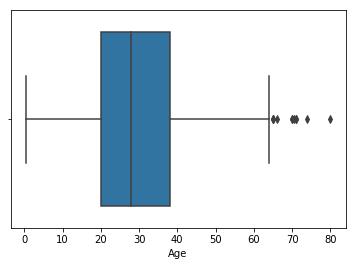

In [11]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [12]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True) # Replacing NAN values

In [13]:
impute_nan(df, 'Age', df.Age.median(), extreme)


In [14]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22
1,1,38.0,71.2833,38
2,1,26.0,7.9250,26
3,1,35.0,53.1000,35
4,0,35.0,8.0500,35


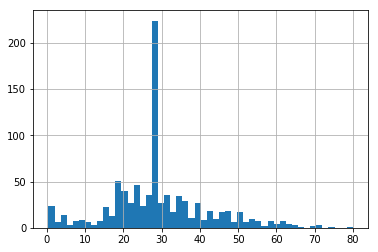

In [15]:
df['Age'].hist(bins=50)

## We see a spike in between because the NAN values are replaced by the median

TypeError: '>' not supported between instances of 'float' and 'AxesSubplot'

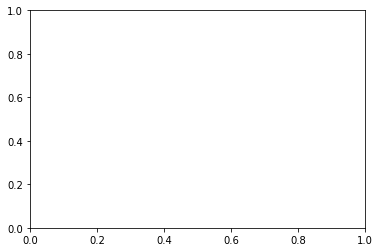

In [17]:
df['Age_end_distribution'].hist(bins=50)

TypeError: unsupported operand type(s) for /: 'AxesSubplot' and 'int'

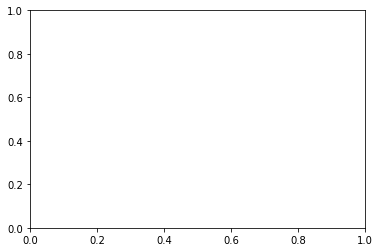

In [18]:
sns.boxplot('Age_end_distribution', data=df)